In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import constants as c, units as u
from astropy import cosmology
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from matplotlib.patches import Rectangle
import seaborn as sns

sns.set_style("ticks", {"xtick.direction": u"in", "ytick.direction": u"in"})
fontsize = 12
plt.rc("font", **{"family": "sans-serif", "serif": ["Arial"]})
plt.rc("xtick", labelsize=fontsize)
plt.rc("ytick", labelsize=fontsize)

red = np.loadtxt("red.spec")
blue = np.loadtxt("blue.spec")
orange = np.loadtxt("orange.spec")
purple = np.loadtxt("purple.spec")
green = np.loadtxt("green.spec")

1.1098600000000001e-16 erg / (Angstrom arcsec2 cm2 s)
1.0059270000000001e-15 erg / (Angstrom arcsec2 cm2 s)
7.26438e-16 erg / (Angstrom arcsec2 cm2 s)
5.5865e-17 erg / (Angstrom arcsec2 cm2 s)
2.1539000000000003e-16 erg / (Angstrom arcsec2 cm2 s)


/Users/aaich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


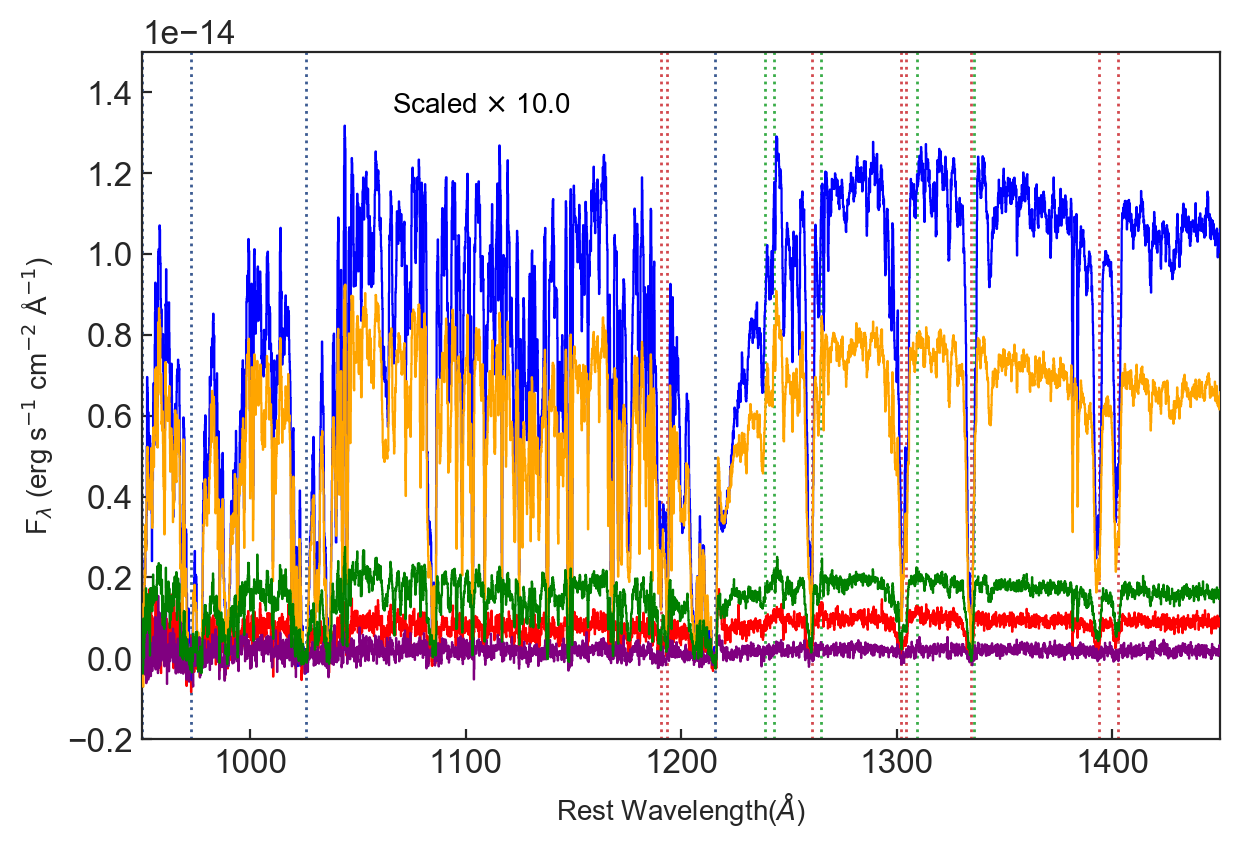

In [20]:
z = 2.79556
rest = red[:,0]/(1+z) * u.AA

plt.figure(dpi=200)

plt.text(
    1066,
    1.35e-14,
    "Scaled $\\times$ {0:2.1f}".format(10),
    color='black'
)
lymanlinelist = [1215.7, 1025.7, 972.54, 949.74, 937.80]
emlinelist = [1238.821, 1242.804, 1264.738, 1309.276, 1335.708]
abslinelist = [1190.416,1193.290,1260.4221,1302.1685,1304.3702,1334.5323,1393.7602,1402.7729]

for lymanline in lymanlinelist:
    plt.axvline(lymanline, linestyle=":", color="xkcd:denim blue", lw=1)
for emline in emlinelist:
    plt.axvline(emline, linestyle=":", color="xkcd:medium green", lw=1)
for absline in abslinelist:
    plt.axvline(absline, linestyle=":", color="xkcd:faded red", lw=1)
plt.tight_layout()
d = {'red':red,'blue':blue,'orange':orange,'purple':purple,'green':green}
for i in d.keys():
    m = d[i][:,1] * 1e-08 * u.erg / u.arcsec ** 2 / u.cm ** 3 / u.s
    s0 = m.to(u.erg / u.s / u.cm ** 2 / u.angstrom / u.arcsec ** 2)
    err = np.sqrt(d[i][:,2]) * 1e-08 *  u.erg / u.arcsec ** 2 / u.cm ** 3 / u.s
    std = err.to(u.erg / u.s / u.cm ** 2 / u.angstrom / u.arcsec ** 2)
    plt.plot(rest,10*s0,drawstyle="steps-mid",color=i, zorder=3, lw = 0.8)
    #plt.plot(rest,200*std,drawstyle="steps-mid",color=i, zorder=3, lw = 0.8, alpha = 0.1)
    plt.xlim([950,1450])
    plt.ylim([-2e-15,15.0e-15])
    plt.xlabel(r'Rest Wavelength($\AA$)')
    plt.ylabel("F$_{\\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)")
    print(s0[1200])
    # save rest frame spectrum to a file
    file = open("J1059_"+str(i)+".dat", "w")
    file.write("# restwave flux\n")
    for j in range(len(s0)):
        file.write("%6.2f %.3e\n" % (rest[j].value, s0[j].value))
    file.close()